In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

# include and import place_emu/util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from place_emu.util import eval

sns.set(font_scale=1.5)
sns.set_style("white")

In [37]:
# read all results
vnf_df = pd.DataFrame()
chain_df = pd.DataFrame()

for net in ['Abilene', 'Airtel', 'Cogentco']:
    for alg in ['bjointsp', 'greedy', 'random']:
        tmp_chain_df, tmp_aux_chain_df, tmp_vnf_df, tmp_aux_vnf_df = eval.prepare_eval(net, alg)

        vnf_df = pd.concat([vnf_df, tmp_vnf_df])
        chain_df = pd.concat([chain_df, tmp_chain_df])

In [38]:
chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Abilene,11,14,fw1chain,3,source0,1,bjointsp,6.0,7.1,1.1,1.183333
1,Abilene,11,14,fw1chain,3,source1,1,bjointsp,6.0,7.1,1.1,1.183333
2,Abilene,11,14,fw1chain,3,source2,1,bjointsp,8.0,9.1,1.1,1.137500
3,Abilene,11,14,fw1chain,3,source3,1,bjointsp,8.0,9.1,1.1,1.137500
4,Abilene,11,14,fw1chain,3,source4,1,bjointsp,14.0,15.1,1.1,1.078571


In [39]:
chain_df.tail()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
25,Cogentco,197,243,fw3chain,5,source5,1,random,166.0,172.55,6.55,1.039458
26,Cogentco,197,243,fw3chain,5,source6,1,random,166.0,172.65,6.65,1.040060
27,Cogentco,197,243,fw3chain,5,source7,1,random,168.0,174.40,6.40,1.038095
28,Cogentco,197,243,fw3chain,5,source8,1,random,168.0,174.80,6.80,1.040476
29,Cogentco,197,243,fw3chain,5,source9,1,random,168.0,174.65,6.65,1.039583


In [40]:
vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Abilene,11,14,fw1chain,3,source0,1,bjointsp,vnf_user,vnf_fw1,2.0,2.192,0.192,1.09600
1,Abilene,11,14,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,4.0,4.218,0.218,1.05450
2,Abilene,11,14,fw1chain,3,source1,1,bjointsp,vnf_user,vnf_fw1,2.0,2.188,0.188,1.09400
3,Abilene,11,14,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,4.0,4.213,0.213,1.05325
4,Abilene,11,14,fw1chain,3,source2,1,bjointsp,vnf_user,vnf_fw1,2.0,2.199,0.199,1.09950


In [41]:
vnf_df.tail()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
85,Cogentco,197,243,fw3chain,5,source8,1,random,vnf_fw1,vnf_web,42.0,43.033,1.033,1.024595
86,Cogentco,197,243,fw3chain,5,source9,1,random,vnf_user,vnf_fw3,10.0,10.795,0.795,1.079500
87,Cogentco,197,243,fw3chain,5,source9,1,random,vnf_fw3,vnf_fw2,58.0,59.656,1.656,1.028552
88,Cogentco,197,243,fw3chain,5,source9,1,random,vnf_fw2,vnf_fw1,58.0,59.706,1.706,1.029414
89,Cogentco,197,243,fw3chain,5,source9,1,random,vnf_fw1,vnf_web,42.0,43.038,1.038,1.024714


## Inter-VNF RTT

RTT between two interconnected VNFs

In [42]:
# calc distance in 1000 km between connected VNFs
c = 299792458   # speed of light in m/s
prop = 0.77   # propagation factor
# divide by 1000 for ms to s and by another 1000 for m to km and another 1000 for km to 1000 km
vnf_df['distance'] = ((vnf_df['sim_rtt'] * c) / (prop * 1000 * 1000 * 1000)).astype('int')
vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio,distance
0,Abilene,11,14,fw1chain,3,source0,1,bjointsp,vnf_user,vnf_fw1,2.0,2.192,0.192,1.09600,0
1,Abilene,11,14,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,4.0,4.218,0.218,1.05450,1
2,Abilene,11,14,fw1chain,3,source1,1,bjointsp,vnf_user,vnf_fw1,2.0,2.188,0.188,1.09400,0
3,Abilene,11,14,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,4.0,4.213,0.213,1.05325,1
4,Abilene,11,14,fw1chain,3,source2,1,bjointsp,vnf_user,vnf_fw1,2.0,2.199,0.199,1.09950,0


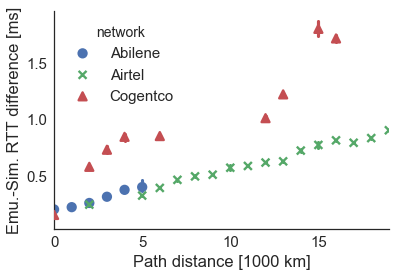

In [43]:
# tuned figure for paper
fig, ax = plt.subplots()

#black_palette = sns.color_palette(['black', 'black', 'black'])
sns.pointplot(x='distance', y='rtt_diff', data=vnf_df, ax=ax,
              hue='network', join=False, markers=['o', 'x', '^'])
sns.despine()
ax.set_xlabel('Path distance [1000 km]')
ax.set_xlim(0, 19)
ax.set_ylabel('Emu.-Sim. RTT difference [ms]')

# fewer x-axis ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# legend outside, custom legend title
#legend = plt.legend(title='Network', bbox_to_anchor=(1.05, 1))
#plt.setp(legend.get_title(),fontsize='small')

fig.savefig('plots/combined_vnf_rtt.pdf', bbox_inches='tight')

Similar effect for all networks. A little strange for Cogentco.

## Chain RTT

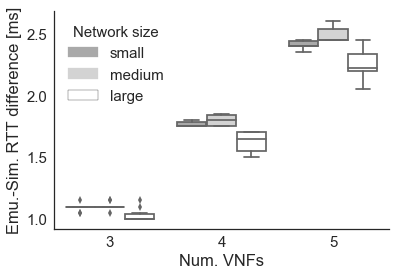

In [44]:
# only consider greedy placements
greedy_chain = chain_df.loc[chain_df['algorithm'] == 'greedy']

fig, ax = plt.subplots()

grayscale = sns.color_palette(['darkgray', 'lightgray', 'white'])
sns.boxplot(x='num_vnfs', y='rtt_diff', hue='network', data=greedy_chain, palette=grayscale, ax=ax)
sns.despine()
ax.set_xlabel('Num. VNFs')
ax.set_ylabel('Emu.-Sim. RTT difference [ms]')

small = mpatches.Patch(color='darkgray', label='small')
medium = mpatches.Patch(color='lightgray', label='medium')
large = mpatches.Patch(facecolor='white', edgecolor='black', label='large')
legend = plt.legend(title='Network size', handles=[small, medium, large])
plt.setp(legend.get_title(),fontsize='small')

fig.savefig('plots/combined_chain_rtt.pdf', bbox_inches='tight')